In [1]:
import pandas as pd
import matplotlib.pyplot as plt
combined_df = pd.read_csv('..\\DATA\\combined_data.csv')


c:\Users\Chris\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Chris\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\3399434696.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('..\\DATA\\combined_data.csv')


In [3]:
pd.set_option('display.max_columns', None)
combined_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,199806,2,2050,199806,2,2100,2149256,5669115,MARYLAND,24.0,1998,June,Tornado,C,23,GARRETT,PBZ,02-JUN-98 20:50:00,EST,02-JUN-98 21:00:00,0,0,0,0,1M,NaN,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F2,3.0,300.0,NaN,NaN,NaN,NaN,4.0,W,FRIENDSVILLE,3.0,SW,FRIENDSVILLE,39.67,-79.50,39.63,-79.45,An F2 tornado passed southeast through souther...,NaN,PDC
1,199806,2,2038,199806,2,2042,2149257,5669116,MARYLAND,24.0,1998,June,Tornado,C,23,GARRETT,PBZ,02-JUN-98 20:38:00,EST,02-JUN-98 20:42:00,0,0,0,0,.5M,NaN,NWS STORM SURVEY,2.0,NaN,NaN,NaN,F2,2.5,700.0,NaN,NaN,NaN,NaN,1.0,NW,FINZEL,2.0,SE,FINZEL,39.73,-78.97,39.70,-78.93,An F2 tornado passed through the town of Finze...,NaN,PDC
2,199806,13,1545,199806,13,1545,2149637,5668053,OKLAHOMA,40.0,1998,June,Tornado,C,11,BLAINE,OUN,13-JUN-98 15:45:00,CST,13-JUN-98 15:45:00,1,0,0,0,NaN,NaN,LAW ENFORCEMENT,NaN,NaN,NaN,NaN,F0,0.1,10.0,NaN,NaN,NaN,NaN,1.0,W,LONGDALE,1.0,W,LONGDALE,36.13,-98.57,36.13,-98.57,"Summary of events of June 13, 1998:During the ...",The Blaine County Sheriff reported a brief tor...,PDC
3,199806,2,2045,199806,2,2050,2149255,5669114,WEST VIRGINIA,54.0,1998,June,Tornado,C,77,PRESTON,PBZ,02-JUN-98 20:45:00,EST,02-JUN-98 20:50:00,0,0,0,0,5M,2M,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F2,4.0,300.0,NaN,NaN,NaN,NaN,1.0,NW,GLADE FARMS,3.0,SE,GLADE FARMS,39.72,-79.55,39.67,-79.50,An F2 tornado passed southeast through souther...,NaN,PDC
4,199806,2,1720,199806,2,1728,2149234,5668877,PENNSYLVANIA,42.0,1998,June,Tornado,C,129,WESTMORELAND,PBZ,02-JUN-98 17:20:00,EST,02-JUN-98 17:28:00,0,0,0,0,NaN,NaN,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F1,6.0,300.0,NaN,NaN,NaN,NaN,3.0,NW,IRWIN,3.0,SE,MANOR,40.37,-79.75,40.30,-79.63,An F1 tornado touched down 5 miles northwest o...,NaN,PDC


In [50]:
columns_need = [
    'BEGIN_YEARMONTH','BEGIN_DATE_TIME', 'YEAR', 'STATE', 'MONTH_NAME', 
    'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 
    'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 
    'TOR_F_SCALE', 'TOR_LENGTH'
]
df = combined_df[columns_need]
df['INJURIES_TOTAL']=df['INJURIES_DIRECT']+df['INJURIES_INDIRECT']
df['DEATHS_TOTAL']=df['DEATHS_DIRECT']+df['DEATHS_INDIRECT']
df.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\1665605398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INJURIES_TOTAL']=df['INJURIES_DIRECT']+df['INJURIES_INDIRECT']
C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\1665605398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEATHS_TOTAL']=df['DEATHS_DIRECT']+df['DEATHS_INDIRECT']


,BEGIN_YEARMONTH,BEGIN_DATE_TIME,YEAR,STATE,MONTH_NAME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,INJURIES_TOTAL,DEATHS_TOTAL
0,199806,02-JUN-98 20:50:00,1998,MARYLAND,June,0,0,0,0,1M,NaN,F2,3.0,0,0
1,199806,02-JUN-98 20:38:00,1998,MARYLAND,June,0,0,0,0,.5M,NaN,F2,2.5,0,0
2,199806,13-JUN-98 15:45:00,1998,OKLAHOMA,June,1,0,0,0,NaN,NaN,F0,0.1,1,0
3,199806,02-JUN-98 20:45:00,1998,WEST VIRGINIA,June,0,0,0,0,5M,2M,F2,4.0,0,0
4,199806,02-JUN-98 17:20:00,1998,PENNSYLVANIA,June,0,0,0,0,NaN,NaN,F1,6.0,0,0


In [51]:
def convert_damage_to_millions(value):
    if isinstance(value, str):
        value = value.strip()  
        if value == '': 
            return None  
        if 'M' in value: 
            value = value.replace('M', '').strip()
            if value == '': 
                return None 
            return float(value) * 1_000_000
        elif 'K' in value:
            value = value.replace('K', '').strip()
            if value == '': 
                return None 
            return float(value) * 1_000
        else:
            try:
                return float(value)  
            except ValueError:
                return None 
    elif isinstance(value, (int, float)):
        return value
    else:
        return None  

df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].apply(convert_damage_to_millions)
df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].fillna(0)

C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\3381420839.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].apply(convert_damage_to_millions)
C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\3381420839.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].fillna(0)


AttributeError: 'Index' object has no attribute 'strftime'

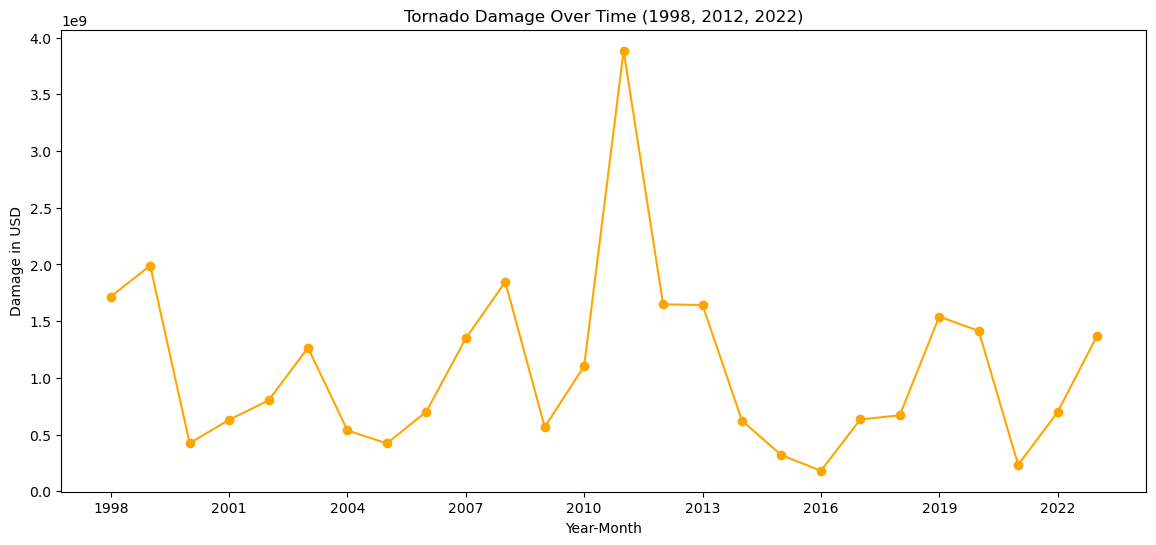

In [59]:
def plot_with_specific_years(x_values, y_values, title, xlabel, ylabel, color='blue'):
    plt.figure(figsize=(14, 6))  # Increase figure size to give more space
    plt.plot(x_values, y_values, marker='o', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Set x-ticks for every third month
    ax = plt.gca()
    ax.set_xticks(x_values[::3])  # Show every third month to reduce clutter
    ax.set_xticklabels(x_values[::3].strftime('%Y-%m'), rotation=45)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()


tornado_damage = df.groupby(df['YEAR'])['DAMAGE_PROPERTY'].sum()
plot_with_specific_years(tornado_damage.index, tornado_damage.values,
                         title='Tornado Damage Over Time (1998, 2012, 2022)',
                         xlabel='Year-Month', ylabel='Damage in USD', color='orange')

In [53]:
num_per_year  = df.groupby('YEAR').size().reset_index(name='NUM_TORNADOES')
num_per_year

,YEAR,NUM_TORNADOES
0,1998,1529
1,1999,1520
2,2000,1169
3,2001,1351
4,2002,1040
5,2003,1535
6,2004,1947
7,2005,1343
8,2006,1263
9,2007,1242


Slope: -0.5846153846153849
Intercept: 2583.292307692308
R-squared: 0.0002412552759276469
P-value: 0.9399687443213751


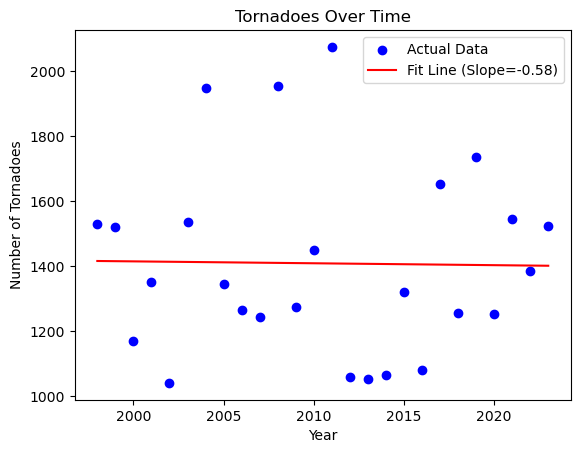

In [54]:
from scipy.stats import linregress
years = num_per_year['YEAR']
tornadoes = num_per_year['NUM_TORNADOES']

slope, intercept, r_value, p_value, std_err = linregress(years, tornadoes)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, tornadoes, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Tornadoes Over Time')
plt.legend()
plt.show()


Slope: -9820740.694017092
Intercept: 20829574613.398285
R-squared: 0.009091438710563943
P-value: 0.6431253407723168


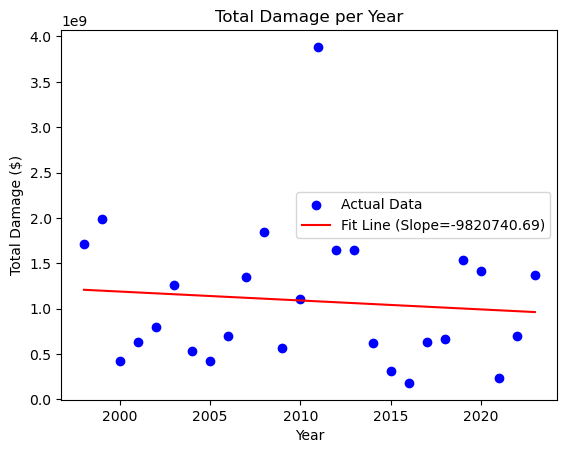

In [55]:
dam_per_year  = df.groupby('YEAR')['DAMAGE_PROPERTY'].sum().reset_index()
years = dam_per_year['YEAR']
total_damage = dam_per_year['DAMAGE_PROPERTY']

slope, intercept, r_value, p_value, std_err = linregress(years, total_damage)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_damage, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Damage ($)')
plt.title('Total Damage per Year')
plt.legend()
plt.show()

Slope: -5896.525391267438
Intercept: 12613239.959170062
R-squared: 0.009477870009827612
P-value: 0.636124545858886


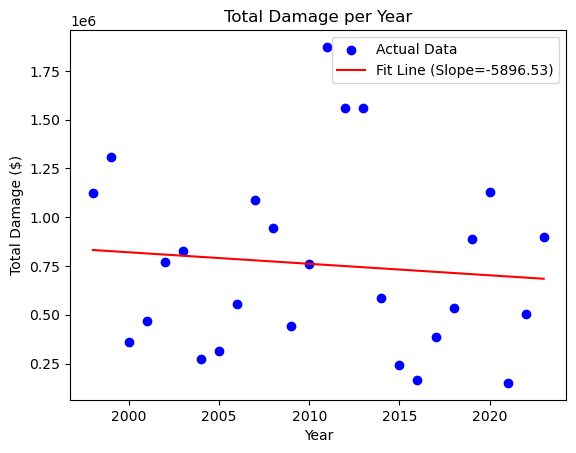

In [94]:
avg_dam_per_year  = df.groupby('YEAR')['DAMAGE_PROPERTY'].mean().reset_index()
years = avg_dam_per_year['YEAR']
total_damage = avg_dam_per_year['DAMAGE_PROPERTY']

slope, intercept, r_value, p_value, std_err = linregress(years, total_damage)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_damage, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Damage ($)')
plt.title('Total Damage per Year')
plt.legend()
plt.show()

Slope: -0.5955555555555555
Intercept: 1275.3644444444444
R-squared: 0.001891266056413572
P-value: 0.8329315778118441


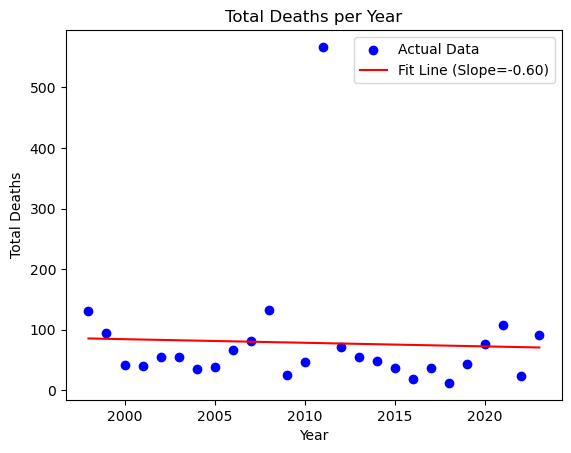

In [56]:
deaths_per_year  = df.groupby('YEAR')['DEATHS_TOTAL'].sum().reset_index()
years = deaths_per_year['YEAR']
total_deaths = deaths_per_year['DEATHS_TOTAL']

slope, intercept, r_value, p_value, std_err = linregress(years, total_deaths)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_deaths, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths per Year')
plt.legend()
plt.show()

Slope: -26.732991452991453
Intercept: 54750.52547008547
R-squared: 0.03853922845546724
P-value: 0.3364638343666011


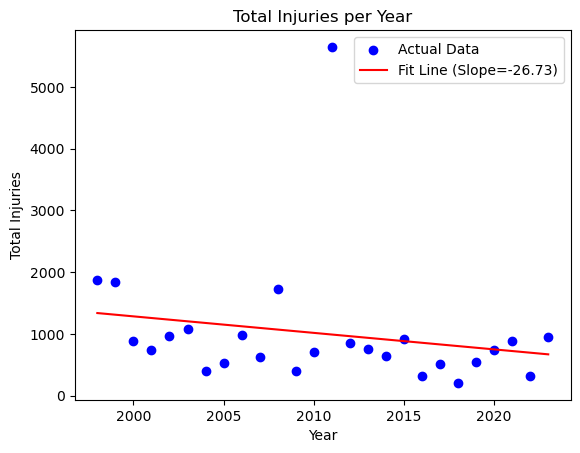

In [58]:
injuries_per_year  = df.groupby('YEAR')['INJURIES_TOTAL'].sum().reset_index()
years = injuries_per_year['YEAR']
total_injuries = injuries_per_year['INJURIES_TOTAL']

slope, intercept, r_value, p_value, std_err = linregress(years, total_injuries)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_injuries, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.title('Total Injuries per Year')
plt.legend()
plt.show()

In [71]:
#injuries_per_year  = df.groupby('YEAR')['INJURIES_TOTAL'].sum().reset_index()
total_tornadoes = df.groupby('YEAR').size().reset_index(name='TOTAL_TORNADOES')
deadly_tornadoes = df[df['DEATHS_TOTAL'] > 1].groupby('YEAR').size().reset_index(name='NUMBER_OF_DEADLY_TORNADOES')
tornado_prop = pd.merge(total_tornadoes, deadly_tornadoes, on='YEAR', how='left')
tornado_prop

,YEAR,TOTAL_TORNADOES,NUMBER_OF_DEADLY_TORNADOES
0,1998,1529,17
1,1999,1520,14
2,2000,1169,5
3,2001,1351,11
4,2002,1040,14
5,2003,1535,12
6,2004,1947,5
7,2005,1343,5
8,2006,1263,10
9,2007,1242,13


In [73]:
df.TOR_F_SCALE.value_counts()

TOR_F_SCALE
EF0    11542
EF1     8197
F0      7933
F1      3320
EF2     2291
EFU     1097
F2      1048
EF3      614
F3       345
EF4      132
F4        68
EF5       14
F5         5
Name: count, dtype: int64

In [83]:

category_order = ['FU','F0', 'F1', 'F2', 'F3', 'F4', 'F5']
df['F_SCALE_SIMPLE'] = df['TOR_F_SCALE'].str[-2:]
df['F_SCALE_SIMPLE'] = pd.Categorical(df['F_SCALE_SIMPLE'], categories=category_order, ordered=True)

df.F_SCALE_SIMPLE.value_counts()

C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\3878681004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F_SCALE_SIMPLE'] = df['TOR_F_SCALE'].str[-2:]
C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\3878681004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F_SCALE_SIMPLE'] = pd.Categorical(df['F_SCALE_SIMPLE'], categories=category_order, ordered=True)


F_SCALE_SIMPLE
F0    19475
F1    11517
F2     3339
FU     1097
F3      959
F4      200
F5       19
Name: count, dtype: int64

In [89]:
f_scale_count = df.groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_pivot = df.pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_pivot.reset_index(inplace=True)
f_scale_pivot.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\2404331431.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_scale_count = df.groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\2404331431.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  f_scale_pivot = df.pivot_table(index='YEAR',


F_SCALE_SIMPLE,YEAR,FU,F0,F1,F2,F3,F4,F5
0,1998,0,914,416,137,48,11,3
1,1999,0,888,381,164,69,16,2
2,2000,0,763,293,83,27,3,0
3,2001,0,866,324,122,31,8,0
4,2002,0,663,243,90,38,6,0


In [93]:
from scipy.stats import chi2_contingency # defining the table 

data = f_scale_pivot
stat, p, dof, expected = chi2_contingency(data) # interpret p-value 
alpha = 0.05 
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

p value is 0.0
Dependent (reject H0)
chi2 statistic:     5974.8
p-value:            0
degrees of freedom: 175
expected frequencies:
[[2.07435807e+03 4.35324317e+01 7.72829634e+02 4.57031008e+02
  1.32502087e+02 3.80561550e+01 7.93663295e+00 7.53980130e-01]
 [2.06965298e+03 4.34336907e+01 7.71076689e+02 4.55994363e+02
  1.32201544e+02 3.79698354e+01 7.91863095e+00 7.52269940e-01]
 [1.86380514e+03 3.91137727e+01 6.94385344e+02 4.10641130e+02
  1.19052768e+02 3.41933528e+01 7.13104333e+00 6.77449116e-01]
 [1.97143415e+03 4.13724727e+01 7.34483961e+02 4.34354392e+02
  1.25927699e+02 3.61679137e+01 7.54283914e+00 7.16569718e-01]
 [1.78911178e+03 3.75462595e+01 6.66557342e+02 3.94184386e+02
  1.14281641e+02 3.28230291e+01 6.84526154e+00 6.50299846e-01]
 [2.08082757e+03 4.36682006e+01 7.75239933e+02 4.58456396e+02
  1.32915334e+02 3.81748445e+01 7.96138570e+00 7.56331642e-01]
 [2.32372802e+03 4.87657039e+01 8.65735719e+02 5.11973211e+02
  1.48430889e+02 4.26310940e+01 8.89073909e+00 8.4462021

In [128]:
df['YEAR']=df['YEAR'].astype(int)
f_scale_count = df[df['YEAR']<2003].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_first = df[df['YEAR']<2003].pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_first.reset_index(inplace=True)
f_scale_first
combined_row = f_scale_first.sum(numeric_only=True).reset_index()
combined_row

C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\31734296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR']=df['YEAR'].astype(int)
C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\31734296.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_scale_count = df[df['YEAR']<2003].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\31734296.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify obse

,F_SCALE_SIMPLE,0
0,YEAR,10000
1,FU,0
2,F0,4094
3,F1,1657
4,F2,596
5,F3,213
6,F4,44
7,F5,5


In [129]:
first_5=combined_row
first_5= first_5[first_5[0] != 10000]
first_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'First_5_Count'}, inplace=True)
FCOUNT=first_5
first_5

C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\2131578314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'First_5_Count'}, inplace=True)


,F_SCALE,First_5_Count
1,FU,0
2,F0,4094
3,F1,1657
4,F2,596
5,F3,213
6,F4,44
7,F5,5


In [130]:
df['YEAR']=df['YEAR'].astype(int)
f_scale_count = df[df['YEAR']>2018].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_first = df[df['YEAR']<2018].pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_first.reset_index(inplace=True)
combined_row1 = f_scale_first.sum(numeric_only=True).reset_index()
last_5=combined_row1
last_5= last_5[last_5[0] != 40150]
last_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'Last_5_Count'}, inplace=True)
last_5

C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\2391977257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR']=df['YEAR'].astype(int)
C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\2391977257.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_scale_count = df[df['YEAR']>2018].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
C:\Users\Chris\AppData\Local\Temp\ipykernel_3520\2391977257.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specif

,F_SCALE,Last_5_Count
1,FU,99
2,F0,15909
3,F1,8389
4,F2,2547
5,F3,782
6,F4,171
7,F5,19


In [137]:
FCOUNT['Last_5_Count'] = last_5['Last_5_Count']
FCOUNT=FCOUNT[FCOUNT['First_5_Count'] != 0]
FCOUNT['First_5_Count']=FCOUNT['First_5_Count'].astype(int)
FCOUNT['Last_5_Count']=FCOUNT['Last_5_Count'].astype(int)

FCOUNT

,F_SCALE,First_5_Count,Last_5_Count
2,F0,4094,15909
3,F1,1657,8389
4,F2,596,2547
5,F3,213,782
6,F4,44,171
7,F5,5,19


In [147]:
from scipy.stats import chi2_contingency # defining the table 
import numpy as np
np.set_printoptions(suppress=True)

contingency_table = FCOUNT.pivot_table(index='F_SCALE', values=['First_5_Count',"Last_5_Count"], fill_value=0)
contingency_table
data = contingency_table
stat, p, dof, expected = chi2_contingency(data) # interpret p-value 
alpha = 0.05 
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)
print(contingency_table)

p value is 4.721464940708155e-14
Dependent (reject H0)
chi2 statistic:     71.616
p-value:            4.7215e-14
degrees of freedom: 5
expected frequencies:
[[ 3840.11581363 16162.88418637]
 [ 1928.60088305  8117.39911695]
 [  603.38369256  2539.61630744]
 [  191.01710916   803.98289084]
 [   41.27505374   173.72494626]
 [    4.60744786    19.39255214]]
         First_5_Count  Last_5_Count
F_SCALE                             
F0              4094.0       15909.0
F1              1657.0        8389.0
F2               596.0        2547.0
F3               213.0         782.0
F4                44.0         171.0
F5                 5.0          19.0
